In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link='https://drive.google.com/open?id=1tyGa0xcytKpOB__e1HUiQOisC2ERCost'

In [3]:
fluff, id = link.split('=')
print(id) # Verify that you have everything after '='

1tyGa0xcytKpOB__e1HUiQOisC2ERCost


In [0]:
import pandas as pd
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('NASDAQ.csv')  

In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [0]:
df = pd.read_csv('NASDAQ.csv')

In [7]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-03,5425.620117,5452.569824,5397.990234,5429.080078,5429.080078,1886200000
1,2017-01-04,5440.910156,5482.350098,5440.240234,5477.000000,5477.000000,1883360000
2,2017-01-05,5474.390137,5495.850098,5464.359863,5487.939941,5487.939941,1792610000
3,2017-01-06,5499.080078,5536.520020,5482.810059,5521.060059,5521.060059,1710770000
4,2017-01-09,5527.580078,5541.080078,5517.140137,5531.819824,5531.819824,1885500000


In [8]:
L=len(df)
print("Length of Dataframe:",L)

Length of Dataframe: 252


In [0]:
Hi = np.array([df.iloc[:,2]])
Low = np.array([df.iloc[:,3]])
Close = np.array([df.iloc[:,4]])

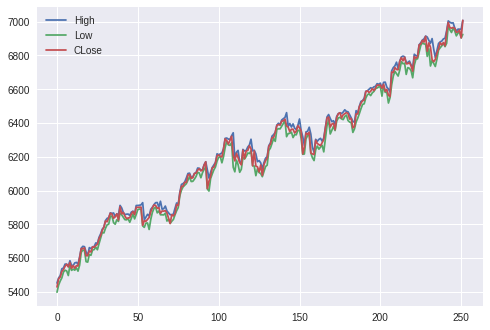

In [10]:
plt.figure(1)
H, = plt.plot(Hi[0,:])
L, = plt.plot(Low[0,:])
C, = plt.plot(Close[0,:])
plt.legend([H,L,C],["High","Low","CLose"])
plt.show(block=False)

In [11]:
X = np.concatenate([Hi,Low],axis=0)
print(X.shape)
X =np.transpose(X)

(2, 252)


In [0]:
y = Close
y = np.transpose(y)

In [0]:
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

In [0]:
scaler1 = MinMaxScaler()
scaler1.fit(y)
y = scaler1.transform(y)

In [15]:
X=np.reshape(X,(X.shape[0],1,X.shape[1]))
print(X.shape)

(252, 1, 2)


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [17]:
model = Sequential([
LSTM(10,activation = 'tanh',input_shape = (1,2),recurrent_activation= 'hard_sigmoid'),
Dense(1),
])
# Model Summary
model.summary()
# Compiling the Model
model.compile(loss="mean_squared_error",optimizer='adam',metrics=["mean_absolute_error"])
# Fitting the Model
model.fit(X_train,y_train,epochs=15,batch_size= 1,verbose=1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 10)                520       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 531
Trainable params: 531
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
176/176 [==============================] - 1s 5ms/step - loss: 0.2109 - mean_absolute_error: 0.3807
Epoch 2/15
176/176 [==============================] - 0s 2ms/step - loss: 0.0321 - mean_absolute_error: 0.1433
Epoch 3/15
176/176 [==============================] - 0s 2ms/step - loss: 0.0176 - mean_absolute_error: 0.1081
Epoch 4/15
176/176 [==============================] - 0s 2ms/step - loss: 0.0108 - mean_absolute_error: 0.0839
Epoch 5/15
176/176 [==============================] - 0s 2ms/step - loss: 0.0058 - mean_absolute

In [18]:
predictions=model.predict(X_test,verbose=1)
print(predictions)

76/76 [==============================] - 0s 1ms/step
[[0.9287684 ]
 [0.5966801 ]
 [0.2900148 ]
 [0.18748328]
 [0.16297631]
 [0.34588602]
 [0.74617535]
 [0.7420564 ]
 [0.45593292]
 [0.4791945 ]
 [0.6139011 ]
 [0.64151365]
 [0.70103705]
 [0.6113632 ]
 [0.91908896]
 [0.08794867]
 [0.17289197]
 [0.4412101 ]
 [0.25482243]
 [0.642154  ]
 [0.53513527]
 [0.44760302]
 [0.30130583]
 [0.68522304]
 [0.2651887 ]
 [0.26689667]
 [0.29778907]
 [0.42366177]
 [0.9122439 ]
 [0.29207662]
 [0.29729   ]
 [0.6367082 ]
 [0.7385676 ]
 [0.6029028 ]
 [0.393605  ]
 [0.45325625]
 [0.865592  ]
 [0.53671443]
 [0.2613132 ]
 [0.30356544]
 [0.50938237]
 [0.25188655]
 [0.49080506]
 [0.53048193]
 [0.28249362]
 [0.59508634]
 [0.60449654]
 [0.21869153]
 [0.26486343]
 [0.39974892]
 [0.26587182]
 [0.6306931 ]
 [0.92264664]
 [0.8750444 ]
 [0.7539195 ]
 [0.42860138]
 [0.26926383]
 [0.10757399]
 [0.22147721]
 [0.93901205]
 [0.6119625 ]
 [0.8918475 ]
 [0.2716088 ]
 [0.6426482 ]
 [0.28308454]
 [0.60350996]
 [0.72565484]
 [0.64170

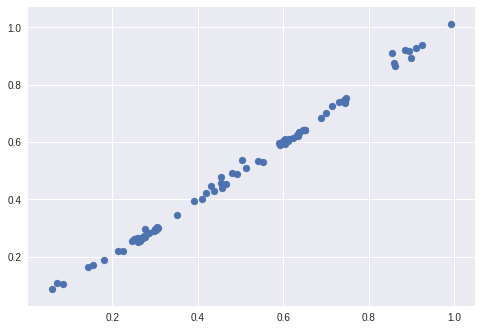

In [19]:
plt.figure(2)
plt.scatter(y_test,predictions)
plt.show(block= False)

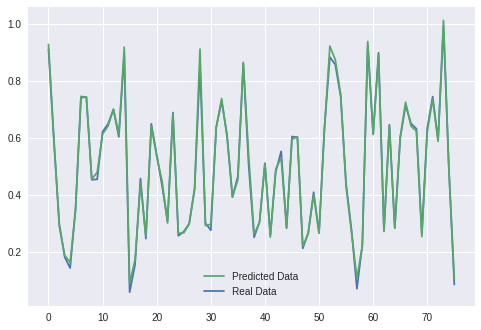

In [20]:
plt.figure(3)
Test, = plt.plot(y_test)
Predict, = plt.plot(predictions)
plt.legend([Predict,Test],["Predicted Data","Real Data"])
plt.show()